![Image](https://img-blog.csdnimg.cn/20190420093034837.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dvbGZjc2hhcnA=,size_16,color_FFFFFF,t_70)

题描述：给定一些数据点，用一个多项式尽可能好的拟合出这些点排布的轨迹，并给出解析解
判断拟合的好坏常用的误差衡量方法是均方根误差，要求均方根误差先要求平方和误差：

![Image](https://img-blog.csdnimg.cn/2019042009364456.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dvbGZjc2hhcnA=,size_16,color_FFFFFF,t_70)


然后计算均方根误差：
在这里插入图片描述多项式拟合问题本质是一个优化问题，目标函数是使RMS误差最小。

![Image](https://img-blog.csdnimg.cn/20190420094142706.png)

本文关注于最小二乘法优化。

![Image](https://img-blog.csdnimg.cn/2019042009434547.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dvbGZjc2hhcnA=,size_16,color_FFFFFF,t_70)


最小二乘法推导：RMS误差与E(W)成正比，E(W)最优等价于RMS最优
E(W)：

$$
E(W)=\frac{1}{2} \sum_{n=1}^{N}\left(y\left(x_{n}, W\right)-t_{n}\right)^{2}=\frac{1}{2}(X W-T)^{\top}(X W-T)
$$
对E(W)求导:
$$
\frac{\partial E(W)}{\partial W}=X^{\top} X W-X^{\top} T
$$
令导数=0:
$$
W=\left(X^{\top} X\right)^{-1} X^{\top} T
$$
通过给定X和T，可以直接求得W, W就是多项式拟合中的系数矩阵。
针对overfitting，加入正则项
$$
\begin{array}{c}
\widetilde{E}(\mathbf{w})=\frac{1}{2} \sum_{n=1}^{N}\left\{y\left(x_{n}, \mathbf{w}\right)-t_{n}\right\}^{2}+\frac{\lambda}{2}\|\mathbf{w}\|^{2} \\
\frac{\partial \widetilde{E}(W)}{\partial W}=\frac{1}{m+1}\left(\left(X^{\top} X+\lambda E_{m+1}\right) W-X^{\top} T\right)
\end{array}
$$
求出W:
$$
W=\left(X^{\top} X+\lambda E_{m+1}\right)^{-1} X^{\top} T
$$


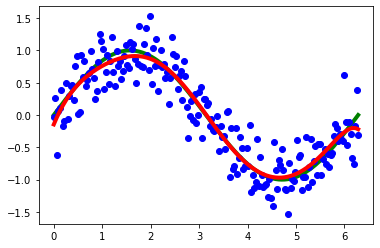

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
SAMPLE_NUM=200#要生成的sample个数
M=9#多项式阶数

#产生带有高斯噪声的信号
mid, sigma = 0, 0.3 # 设置均值和方差
noise = np.random.normal(mid, sigma, SAMPLE_NUM).reshape(SAMPLE_NUM,1) #生成SAMPLE_NUM个数据

#产生SAMPLE_NUM个序号(范围是2pi)
x = np.arange(0, SAMPLE_NUM).reshape(SAMPLE_NUM,1)/(SAMPLE_NUM-1)*(2*math.pi)

#generate y and y_noise, and both y's and y_noise's shape is (SAMPLE_NUM*1)
y=np.sin(x)
y_noise=np.sin(x)+noise

#绿色曲线显示x - y，散点显示x - y_noise
plt.title("")
plt.plot(x,y,'g',lw=4.0)
plt.plot(x,y_noise,'bo')
 

#generate Matrix X which has M order
X=x
for i in range(2,M+1):
         X = np.column_stack((X, pow(x,i)))

#add 1 on the first column of X, now X's shape is (SAMPLE_NUM*(M+1))
X = np.insert(X,0,[1],1)
#print(X)

#calculate W, W's shape is ((M+1)*1)#
#W=np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y_noise)#have no regularization
W=np.linalg.inv((X.T.dot(X))+np.exp(-8) * np.eye(M+1)).dot(X.T).dot(y_noise)#introduce regularization
y_estimate=X.dot(W)

#红色曲线显示x - y_estimate
plt.plot(x,y_estimate,'r',lw=4.0)
plt.show()  